In [4]:
import pandas as pd 

#### Task 1: Merge the 12 months of sales data into a single CSV file 

##### First, import os and define the files path and extension

In [5]:
import os
path = '/Users/jeanbonheurluhandukabeya/Documents/PY_Sales_Analysis/PY_Sales_Analysis/Sales_Data'
extension = '.csv'

#### Second, Create a List of CSV File Names


In [6]:
files = [file for file in os.listdir(path) if file.endswith(extension)]

#### Third, Import the CSV Files into Pandas 


In [7]:
dfs = []
for file in files:
    df = pd.read_csv(os.path.join(path, file))
    dfs.append(df)

#### Fourth, Concatenate the DataFrames into One

In [8]:
df = pd.concat(dfs, ignore_index=True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Another way of performing the above task: 
##### import pandas as pd
##### import os
##### df = pd.read_csv("path/to/a/single/file/")
##### files = [file for file in os.listdir("path/to/the/genral/folder_containing_all_files")]
##### all_months_data = pd.DataFrame()
##### for file in files: 
#####    df = pd.read_csv("path/to/the/genral/folder_containing_all_files"+file)
#####    all_months_data = pd.concat([all_months_data, df])

#### Fifth, export or save the concatenated all_data

In [9]:
df.to_csv("all_data.csv", index=False)

#### Sixth, read in updated dataframe

In [10]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Task 2: Clean up the dataset

#### To be able to perform som tasks, we need to clean up the data 

##### Drop rows of NAN

In [11]:
nan_df = all_data[all_data.isna().any(axis=1)] #Shows all NaN values within the dataset
nan_df.head()

all_data = all_data.dropna(how= 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


##### Find 'Or' and delete it (Order Date/Month)

In [12]:
# temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or'] #Shows records containing 'Or' value in Order Date
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or'] #Only shows records that doesn´t contain 'Or' value
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


##### Convert columns to the correct type, because we will perfom a math calculation (Sales = qt * price)

In [13]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Task 3: create a new column "Month"

In [14]:
all_data['Month']= all_data['Order Date'].str[0:2]
all_data['Month']= all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Task 4: create a new column "Sales" and calculate the sales amounts

In [15]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


### Question 1: What was the best month for sales? How much was earned that month? 

In [16]:
results = all_data.groupby('Month').sum()
results.head(12)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
Month,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",1822256.73
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",2202022.42
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2807100.38
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",3390670.24
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",3152606.75
6,1957481958691960721961321966381966391976981990...,27in FHD MonitorAAA Batteries (4-pack)Lightnin...,15253,2562025.61,06/01/19 03:2606/01/19 01:0606/01/19 00:1806/0...,"856 Elm St, San Francisco, CA 94016877 Center ...",2577802.26
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",2647775.76
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",2244467.88
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",2097560.13


#### Ploting this result/finding

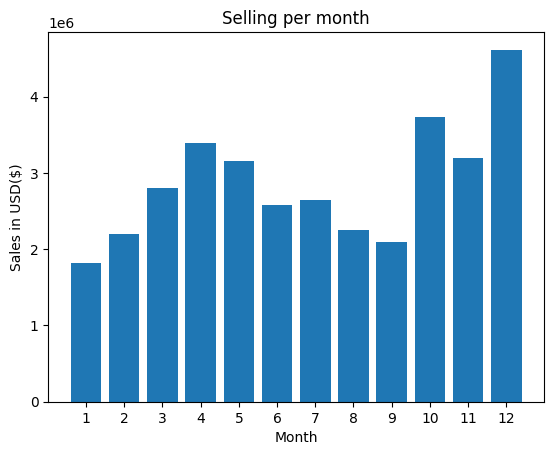

In [17]:
import matplotlib.pyplot as plt

months = range (1, 13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month')
plt.title('Selling per month')
plt.show()

#### Finding 1: December was the best selling month followed by october, april, november and may. January was the lowest month for sales. 

### Question 2: What city had the highest number of sales

#### Task 5: Create a new column "City"

In [18]:
def get_city(address): 
   return address.split(',')[1]

def get_state(address): 
   return address.split(',')[2].split(' ')[1]

all_data['City_state'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')

# To avoid "+", we can use "f {}" function: 
# all_data['City_state'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_state
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [19]:
results= all_data.groupby('City_state').sum()
results

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City_state,,,,,,,,
Atlanta (GA),2956692956932957102957372957372957562957602957...,USB-C Charging CableWired HeadphonesAAA Batter...,16602,2779908.20,12/18/19 12:3812/16/19 16:4012/26/19 19:0912/1...,"43 Hill St, Atlanta, GA 30301856 12th St, Atla...",104794,2795498.58
Austin (TX),2956802957022957032957032957542957892957982958...,Lightning Charging CableWired HeadphonesAA Bat...,11153,1809873.61,12/01/19 14:3012/21/19 18:5012/17/19 12:2712/1...,"338 Main St, Austin, TX 73301628 River St, Aus...",69829,1819581.75
Boston (MA),2956772956812956812956812956812956872956952957...,AA Batteries (4-pack)Google PhoneUSB-C Chargin...,22528,3637409.77,12/20/19 19:1912/25/19 12:3712/25/19 12:3712/2...,"866 Pine St, Boston, MA 0221579 Elm St, Boston...",141112,3661642.01
Dallas (TX),2956722956732956742956782956792956942957242957...,USB-C Charging CableBose SoundSport Headphones...,16730,2752627.82,12/13/19 09:2912/15/19 23:2612/28/19 11:5112/0...,"813 Hickory St, Dallas, TX 75001718 Wilson St,...",104620,2767975.40
Los Angeles (CA),2956762956882956912956922957062957142957162957...,ThinkPad LaptopApple Airpods HeadphonesBose So...,33289,5421435.23,12/28/19 17:1912/08/19 11:2112/22/19 18:3412/1...,"410 Lincoln St, Los Angeles, CA 90001546 Park ...",208325,5452570.80
New York City (NY),2956652956662956672956702956982956982957002957...,Macbook Pro LaptopLG Washing MachineUSB-C Char...,27932,4635370.83,12/30/19 00:0112/29/19 07:0312/12/19 18:2112/3...,"136 Church St, New York City, NY 10001562 2nd ...",175741,4664317.43
Portland (ME),2956862957972958622960182961272961582962062962...,USB-C Charging CableWired HeadphonesAAA Batter...,2750,447189.25,12/17/19 16:1012/16/19 09:2312/03/19 14:2212/2...,"573 Maple St, Portland, ME 04101163 Washington...",17144,449758.27
Portland (OR),2956712956822957342957572958192958572958922958...,USB-C Charging CableUSB-C Charging CableAAA Ba...,11303,1860558.22,12/16/19 15:1012/23/19 19:2512/25/19 12:3812/0...,"928 12th St, Portland, OR 97035780 Elm St, Por...",70621,1870732.34
San Francisco (CA),2956682956752956832956842956852956892956962956...,27in FHD MonitorUSB-C Charging CableWired Head...,50239,8211461.74,12/22/19 15:1312/13/19 13:5212/23/19 22:4612/0...,"410 6th St, San Francisco, CA 94016594 1st St,...",315520,8262203.91


#### Ploting this result/finding

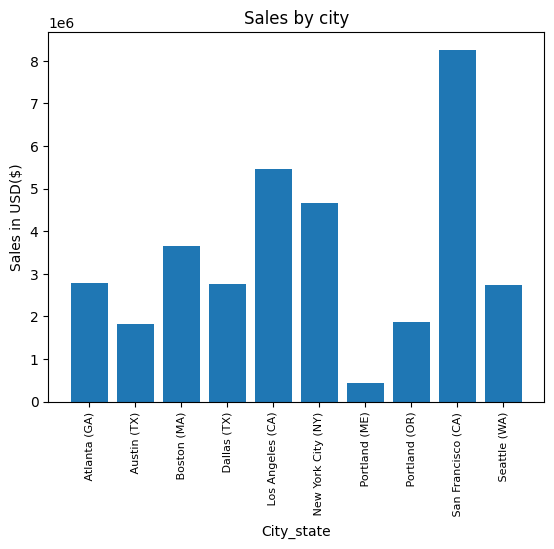

In [20]:
cities = [city_state for city_state, df in all_data.groupby('City_state')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation= 'vertical', size=8) #rotate the city names from horizontal to vertical
plt.ylabel('Sales in USD($)')
plt.xlabel('City_state')
plt.title('Sales by city')
plt.show()

#### Finding 2: San Francisco is the city with the highest sales, followed by Los Angeles and New York City. Portland has the lowest performance

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product? 

#### step 1: convert the column "Order Date" to a datetime type/format

In [21]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

/var/folders/9h/j7gjt47j6w9cb8p93spj_h8w0000gn/T/ipykernel_16487/1435542791.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_state
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


#### Step 2: create a new column "Hour" and "Minute"

In [22]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City_state,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


#### ploting the answer of the third question

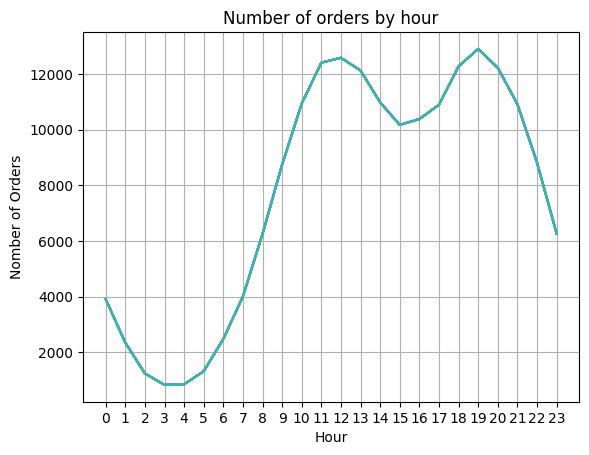

In [23]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel ('Hour')
plt.ylabel('Nomber of Orders')
plt.title('Number of orders by hour')
plt.grid() #add the grid/randig

plt.show()

#### Finding 3: Customers order more at midday, between 11 and 13 o'clock, as well as in the evening, between 18 and 20 o'clock. The company sells very little at night, and sales begin to increase again when the workday starts at approximately 6 o'clock.

#### Answer to question 3: Before 11 o'clock and between 18 o'clock should be the best times to display the advertisement to attract customers to buy more."

### Question 4: What products are most often sold togheter? 

#### Products that are solt togheter has the same order ID, so we have to look which products in each order ID are solt the most. 

#### Step 1: shows all duplicated order ID, which means that products were bought togheter. And then create a new gouped column for these products


In [24]:
df = all_data[all_data['Order ID'].duplicated(keep=False)].copy()
df.loc[:, 'Grouped_product'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped_product']].drop_duplicates()
print(df.head().to_string(index=False, max_colwidth=1000))


Order ID                                                               Grouped_product
  295681 Google Phone,USB-C Charging Cable,Bose SoundSport Headphones,Wired Headphones
  295698                                          Vareebadd Phone,USB-C Charging Cable
  295703                              AA Batteries (4-pack),Bose SoundSport Headphones
  295726                                               iPhone,Lightning Charging Cable
  295735                              iPhone,Apple Airpods Headphones,Wired Headphones


#### step 2: count the occurances of the two corelated purchased products in the orders

In [25]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped_product']: 
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
# Easiest way to structure the output
for key, value in count.most_common(10):
    print (key, value)
    
#for combination, frequency in count.items():    # Just to structure the output
#    print(f"Combination: {', '.join(combination)} - Frequency: {frequency}")    # Just to structure the output

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Finding 4: The most two corelated products sell togethet is Iphone & Lightning Charging Cable, etc. This information can help the company to structure its products offering and promotions. 

### Question 5: What product sold the most? Why do you think it sold the most? 

#### Step 1: summarize the quantity ordered based on grouping by the product

In [26]:
#product_group = all_data.groupby('Product')['Quantity Ordered'].sum()
product_group = all_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False) #sort it DESC
print (product_group)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64


#### Show the finding in a vertical bar chat 

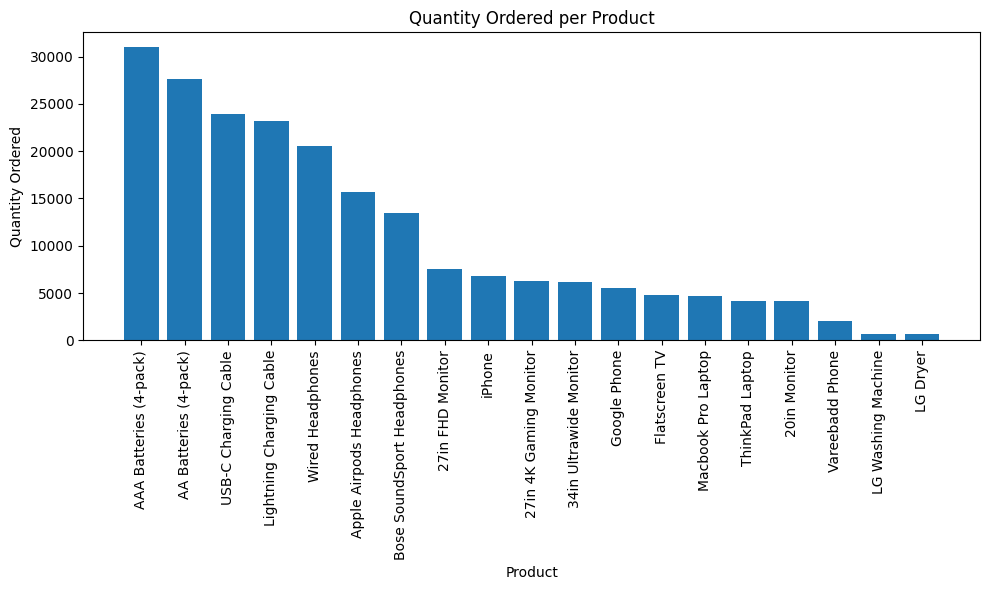

In [27]:

# Grouping by 'Product' and summing 'Quantity Ordered', then sorting in descending order
product_group = all_data.groupby('Product')['Quantity Ordered'].sum().reset_index()
product_group_sorted = product_group.sort_values(by='Quantity Ordered', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(product_group_sorted['Product'], product_group_sorted['Quantity Ordered'])

# Adding labels and titles
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered per Product')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap of labels
plt.show()

##### Finding 5: AAA Batteries (4-pack) was the most solt item, followed by AA Bateries and USB-C Charging, etc

#### Step 2: finding why these product solt the most

In [28]:
# Convert 'Price Each' column to numeric
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Group by 'Product' and calculate the mean of 'Price Each'
prices = all_data.groupby('Product')['Price Each'].mean()
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


#### We can note that items with lower prices are also highly sold, but this assumption doesn't apply to all products. For example, "Wired Headphones" are cheaper than the Lightning Charging Cable, yet the latter has higher sales. Macbooks are more expansive than LG Dryer, but Macbooks sell better than the latter. Thus, cheaper products are generally the best-selling ones, but this is not always the case, the are other additional factors.

#### Step 3: Create a "dual chart" to vizualize the contrast between product prices and quantity ordered

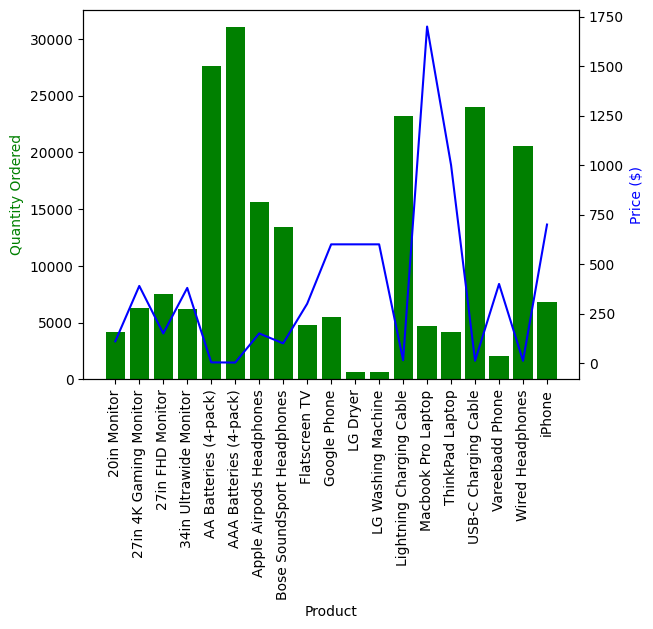

In [29]:
# Group by 'Product' and calculate the mean of 'Price Each'
prices = all_data.groupby('Product')['Price Each'].mean()

# Create a dual-axis plot
fig, ax1 = plt.subplots()

# Rotate x-axis labels
plt.xticks(rotation='vertical')

# Plot bar chart for quantity ordered on primary y-axis
ax1.bar(prices.index, all_data.groupby('Product')['Quantity Ordered'].sum(), color='g')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')

# Create secondary y-axis for prices
ax2 = ax1.twinx()
ax2.plot(prices.index, prices, 'b-')
ax2.set_ylabel('Price ($)', color='b')


plt.show()